## EDA for the Log Anamly

In [1]:
import pandas as pd
import time
import seaborn as sns
import collections
import copy
import polars as pl
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.util import ngrams
from pathlib import Path
from yellowbrick.target import class_balance
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
current_dir = Path.cwd()
project_dir = current_dir.parent
train_path=  Path(project_dir, 'data/train.json')

In [3]:
t1 =time.time()
main_df= pd.read_json(train_path, orient='index')
t2 =time.time()
main_df.reset_index(inplace = True)
main_df.rename(columns= {0 : 'Target', 'index' :'Log'}, inplace= True)
print(f"Done loading the data in {t2-t1:.2f}")

Done loading the data in 6.54


In [4]:
main_df.head()

,Log,Target
0,1117838570 2005.06.03 R02-M1-N0-C:J12-U11 200...,normal
1,1117838570 2005.06.03 R02-M1-N0-C:J12-U11 200...,normal
2,1117838570 2005.06.03 R02-M1-N0-C:J12-U11 200...,normal
3,1117838570 2005.06.03 R02-M1-N0-C:J12-U11 200...,normal
4,1117838570 2005.06.03 R02-M1-N0-C:J12-U11 200...,normal


In [5]:
print(f"Dataset is has {main_df.shape[0]} samples")

Dataset is has 4152659 samples


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

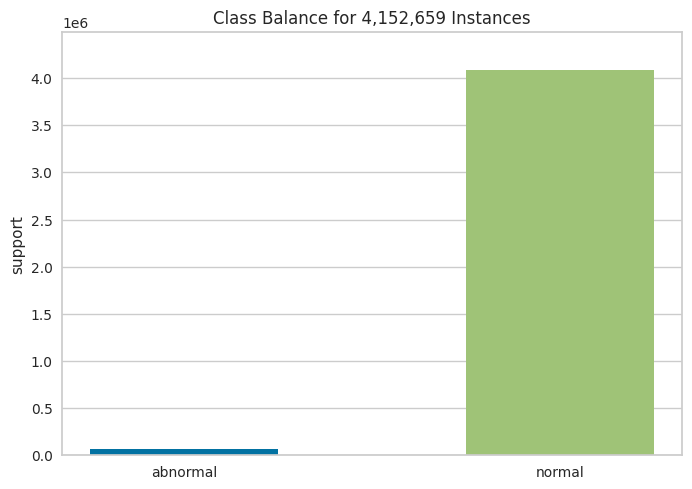

ClassBalance(ax=<Axes: title={'center': 'Class Balance for 4,152,659 Instances'}, ylabel='support'>)

In [6]:
class_balance(main_df['Target'])

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(main_df['Log'], main_df['Target'], random_state= 23, test_size=0.97,
                                                    stratify=main_df['Target'])

In [8]:
X_train.shape, Y_train.shape

((415265,), (415265,))

In [9]:
df = pd.DataFrame()
df['Log'] = X_train
df['Target'] = Y_train
df.reset_index(inplace=True)
df.drop(['index'], axis = 1,inplace= True)
df.head()

,Log,Target
0,1121308678 2005.07.13 R24-M0-N6-C:J12-U11 200...,normal
1,1118771367 2005.06.14 R25-M0-NF-C:J10-U01 200...,normal
2,1132328445 2005.11.18 R24-M1-N8-I:J18-U01 200...,normal
3,1122132756 2005.07.23 R16-M0-N1-C:J13-U11 200...,normal
4,1122162161 2005.07.23 R22-M1-NF-C:J11-U01 200...,normal


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

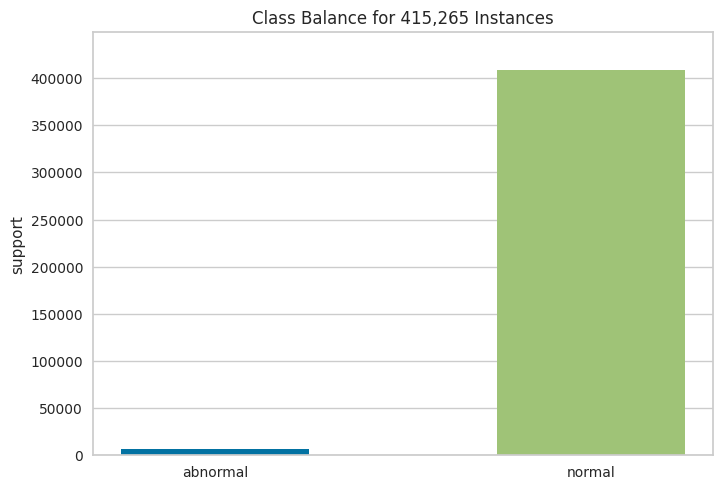

ClassBalance(ax=<Axes: title={'center': 'Class Balance for 415,265 Instances'}, ylabel='support'>)

In [10]:
class_balance(df['Target'])

In [11]:
#Exploring a few samples 
samples = list(df.iloc[:10,0])
for doc in samples:
    print(doc)

 1121308678 2005.07.13 R24-M0-N6-C:J12-U11 2005-07-13-19.37.58.280467 R24-M0-N6-C:J12-U11 RAS KERNEL INFO generating core.28893

 1118771367 2005.06.14 R25-M0-NF-C:J10-U01 2005-06-14-10.49.27.754428 R25-M0-NF-C:J10-U01 RAS KERNEL FATAL byte ordering exception.....................0

 1132328445 2005.11.18 R24-M1-N8-I:J18-U01 2005-11-18-07.40.45.983425 R24-M1-N8-I:J18-U01 RAS KERNEL INFO ciod: Received signal 15, code=0, errno=0, address=0x000001b0

 1122132756 2005.07.23 R16-M0-N1-C:J13-U11 2005-07-23-08.32.36.136005 R16-M0-N1-C:J13-U11 RAS KERNEL INFO generating core.16057

 1122162161 2005.07.23 R22-M1-NF-C:J11-U01 2005-07-23-16.42.41.666779 R22-M1-NF-C:J11-U01 RAS KERNEL INFO 5 floating point alignment exceptions

 1120940299 2005.07.09 R23-M0-N1-C:J09-U11 2005-07-09-13.18.19.124221 R23-M0-N1-C:J09-U11 RAS KERNEL INFO generating core.23546

 1122165335 2005.07.23 R16-M0-N9-C:J08-U11 2005-07-23-17.35.35.679103 R16-M0-N9-C:J08-U11 RAS KERNEL INFO 5 floating point alignment exceptions



In [12]:
df.iloc[4,0].split()

['1122162161',
 '2005.07.23',
 'R22-M1-NF-C:J11-U01',
 '2005-07-23-16.42.41.666779',
 'R22-M1-NF-C:J11-U01',
 'RAS',
 'KERNEL',
 'INFO',
 '5',
 'floating',
 'point',
 'alignment',
 'exceptions']

In [13]:
df["Character_Length"] = df["Log"].str.len()
df["Word_Length"] = df["Log"].str.split().map(lambda x: len(x))
df["Avg Word"] = df["Log"].str.split().apply(lambda x: [len(i) for i in x]).map(lambda x: np.mean(x))
df.head()

,Log,Target,Character_Length,Word_Length,Avg Word
0,1121308678 2005.07.13 R24-M0-N6-C:J12-U11 200...,normal,128,10,11.700000
1,1118771367 2005.06.14 R25-M0-NF-C:J10-U01 200...,normal,153,11,12.818182
2,1132328445 2005.11.18 R24-M1-N8-I:J18-U01 200...,normal,168,15,10.133333
3,1122132756 2005.07.23 R16-M0-N1-C:J13-U11 200...,normal,128,10,11.700000
4,1122162161 2005.07.23 R22-M1-NF-C:J11-U01 200...,normal,144,13,10.000000


In [14]:
print(f"Character Length ranges from {df['Character_Length'].min()} to {df['Character_Length'].max()}")
print(f"Word Length ranges from {df['Word_Length'].min()} to {df['Word_Length'].max()}")

Character Length ranges from 94 to 928
Word Length ranges from 8 to 101


array([[<Axes: title={'center': 'Character_Length'}>,
        <Axes: title={'center': 'Word_Length'}>]], dtype=object)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

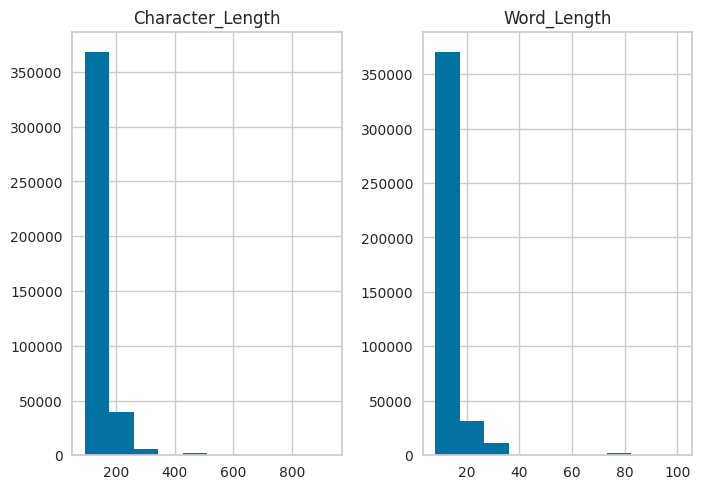

In [15]:
columns = ['Character_Length', 'Word_Length']
df.hist(column=columns, grid=True)

In [16]:
def plot_top_stopwords_barchart(text):
    stop = set(stopwords.words('english'))

    new = text.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]
    from collections import defaultdict
    dic = defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
    top = sorted(dic.items(), key = lambda x:x [1],reverse=True)[:10]
    x,y = zip(*top)
    plt.bar(x,y)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

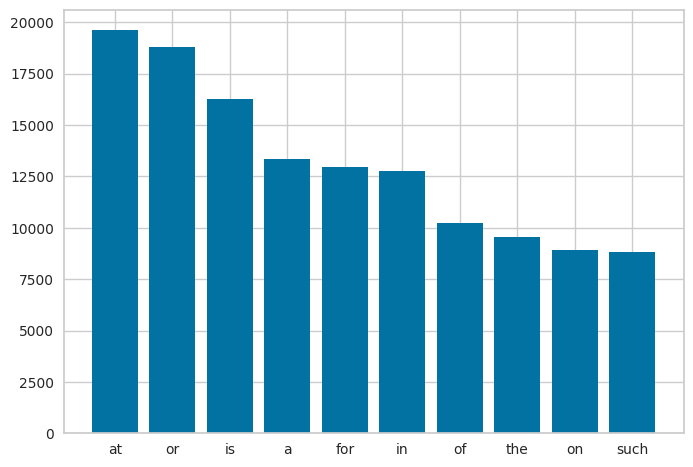

In [17]:
plot_top_stopwords_barchart(df['Log'])

In [18]:
def clean_text(text):
    text = text.lower()
    text = re.sub('<[^>]*>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    stop_words = set(stopwords.words('english'))
    text = [word for word in text.split() if word not in stop_words and word not in string.punctuation]
    text = ' '.join(word for word in text)
    return text

In [19]:
df['Log'] = df['Log'].apply(clean_text)

In [20]:
df.head()

,Log,Target,Character_Length,Word_Length,Avg Word
0,rmncju rmncju ras kernel info generating core,normal,128,10,11.700000
1,rmnfcju rmnfcju ras kernel fatal byte ordering...,normal,153,11,12.818182
2,rmniju rmniju ras kernel info ciod received si...,normal,168,15,10.133333
3,rmncju rmncju ras kernel info generating core,normal,128,10,11.700000
4,rmnfcju rmnfcju ras kernel info floating point...,normal,144,13,10.000000


In [21]:
def plot_top_non_stopwords_barchart(text):
    stop = set(stopwords.words('english'))
    new = text.str.split()
    new = new.values.tolist()
    corpus =[word for i in new for word in i ]
    counter = collections.Counter(corpus)
    most = counter.most_common()
    x, y =[], []
    for word, count in most[:50]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    sns.barplot(x=y,y=x)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

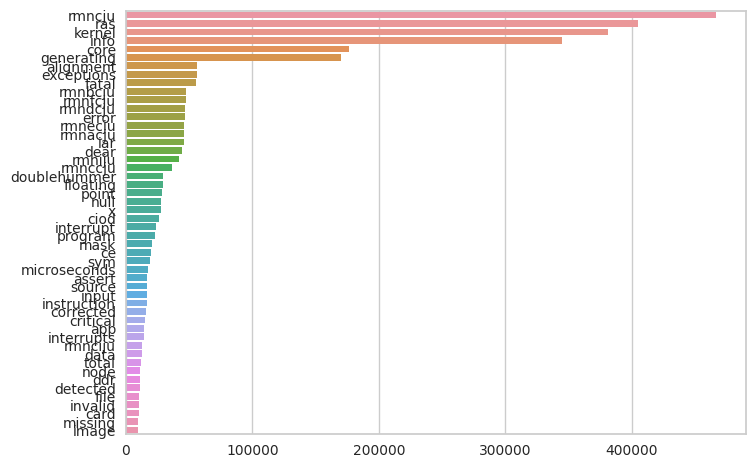

In [22]:
plot_top_non_stopwords_barchart(df['Log'])

In [25]:
def plot_top_word_grams_barchart(text, no_grams = 2):
    stop = set(stopwords.words("english"))
    new = text.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngrams_range =(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0)
        words_freq = [(word, sum_words[0,idx])
                      for word, idx in vec.vocabulary_.items()]
        words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]
    top_n_bigrams= _get_top_ngram(text, no_grams)[:10]
    x,y = map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

In [26]:
plot_top_word_grams_barchart(df['Log'])

TypeError: CountVectorizer.__init__() got an unexpected keyword argument 'ngrams_range'